<a href="https://colab.research.google.com/github/aurimas13/CodeAcademy-AI-Course/blob/main/Notebooks_In_Progress/Deep_Learning_5_Lecture_3_Demonstration_1_of_Linear_Regression_with_Perceptron_PyTorch_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Terminology related to Linear Regression with Perceptron

+ Tensor: Tensor is an array that stores the data just like any other data structure. The collection of stored values can be easily accessed through indexing. Scalar –> Vector –> Matrix –> Tensor


+ Optimization: The process of changing certain values(s) to get a better result altogether.

+ Loss: The difference between actual and expected output. The term signifies the value that needs to be minimized to get the best-optimized model.

+ Variable: The input values that we already possess as the data to create a model on are called variables. 

+ Weights: The coefficient values that are attached to the linear equation and optimized during the training to minimize the loss are called weights of a model. 

+ Bias: The constant value used in the linear equation to manage the vertical placement of the line over the cartesian plane. 

# <b> What is Perceptron? </b>
The simplest neural network which is nothing but a single neuron is termed a Perceptron. 

A Neuron is nothing but a couple of mathematical functions stacked on top of each other. Here is how it looks like diagrammatically.The equation is a simple functional equation that applies a function on input and produces an output.

![Screenshot 2023-01-03 at 12.07.49.png](attachment:597ce807-f036-4b5e-bdb5-3ba253bea723.png)
![Screenshot 2023-01-03 at 12.02.59.png](attachment:fc06289d-47ce-4fce-a86d-569a8a818636.png)

## 1. Importing libraries and Creating Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3],
                   [7.8], [8.9], [5.2], [4.59], [2.1],
                    [8], [5], [7.5], [5], [4],
                    [8], [5.2], [4.9], [3], [4.7],
                    [4], [4.8], [3.5], [2.1], [4.1]],
                   dtype = np.float32)

In [ ]:
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4],
                    [3.3], [2.6], [1.96], [3.13], [1.76],
                    [3.2], [2.1], [1.6], [2.5], [2.2],
                    [2.75], [2.4], [1.8], [1], [2],
                    [1.6], [2.4], [2.6], [1.5], [3.1]],
                   dtype = np.float32)

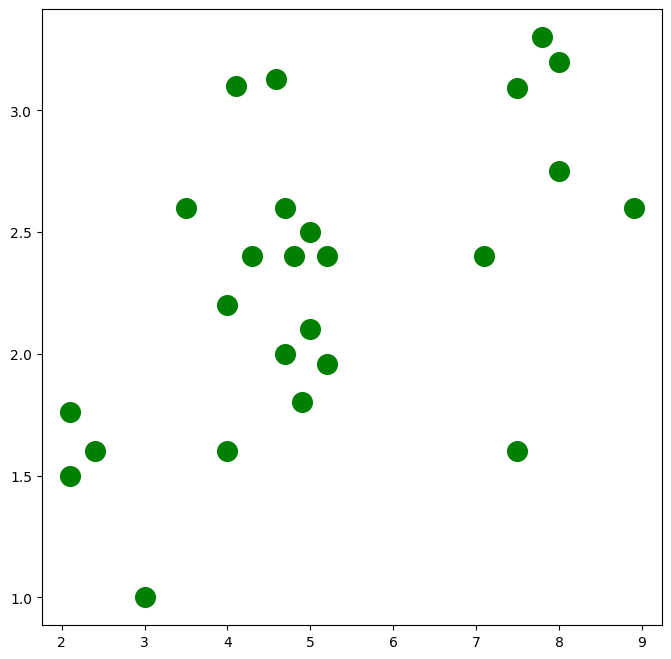

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, c='green', s=200, label='Original data')
plt.show()

## 2. Data preparation and Modelling with Pytorch

In [ ]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


## <b> Modeling in Pytorch

In [ ]:
w1 = torch.rand([1,1], requires_grad=True)

In [ ]:
b1 = torch.rand([1,1], requires_grad=True)

In [ ]:
input_size, hidden_size, output_size = 1, 1, 1
learning_rate = 0.001

## <b> Training and Visualizing Linear Regression Model with Perceptron in Pytorch

In [ ]:
for iter in range(1, 4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1) # mm same as @ 
    loss = (y_pred - Y_train).pow(2).sum()
    if iter % 100 == 0:
        print(iter, loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 8.914584159851074
200 8.912376403808594
300 8.912376403808594
400 8.912376403808594
500 8.912376403808594
600 8.912376403808594
700 8.912376403808594
800 8.912376403808594
900 8.912376403808594
1000 8.912376403808594
1100 8.912376403808594
1200 8.912376403808594
1300 8.912376403808594
1400 8.912376403808594
1500 8.912376403808594
1600 8.912376403808594
1700 8.912376403808594
1800 8.912376403808594
1900 8.912376403808594
2000 8.912376403808594
2100 8.912376403808594
2200 8.912376403808594
2300 8.912376403808594
2400 8.912376403808594
2500 8.912376403808594
2600 8.912376403808594
2700 8.912376403808594
2800 8.912376403808594
2900 8.912376403808594
3000 8.912376403808594
3100 8.912376403808594
3200 8.912376403808594
3300 8.912376403808594
3400 8.912376403808594
3500 8.912376403808594
3600 8.912376403808594
3700 8.912376403808594
3800 8.912376403808594
3900 8.912376403808594
4000 8.912376403808594


1. Forward Pass:

Predicting output value Y with input value X using the linear equation. 

2. Finding Loss:

Finding the difference between Y_train and Y_pred by squaring the difference and then summing it.

3. For the loss_backward() function call:

backward pass will compute the gradient of the loss with respect to all Tensors with ‘requires_grad=True’.

4. Manually updating the weights

Weights have requires_grad=True, but we don’t need to track this in ‘autograd’. So will wrap it in ‘torch.no_grad’ updating the reduced weight by subtracting the multiplication of learning rate and gradients manually zero the weight gradients after updating weights to store the latest values for the next iteration. 

In [ ]:
print('w1: ', w1)
print('b1: ', b1)

w1:  tensor([[-0.4648]], requires_grad=True)
b1:  tensor([[2.3036]], requires_grad=True)


In [ ]:
predicted = (X_train.mm(w1).clamp(min=0).add(b1)).detach().numpy()

## Visualizing the Prediction and Actual values


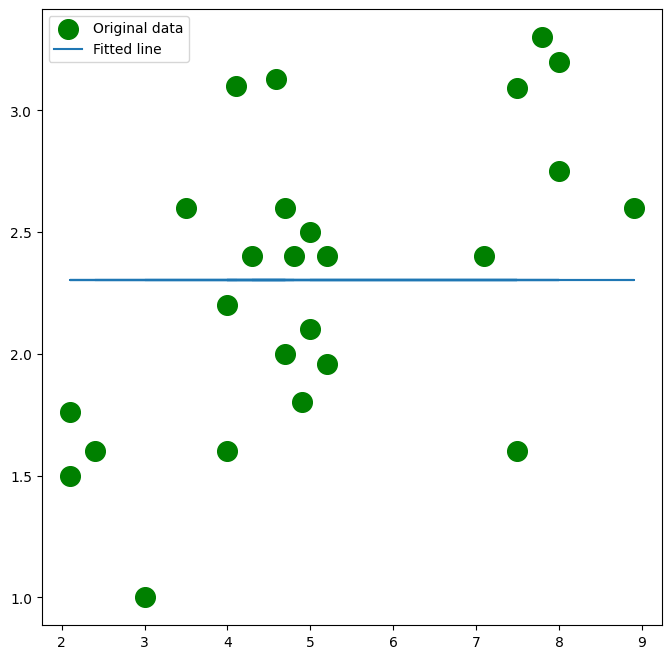

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=200, label='Original data')
plt.plot(x_train, predicted, label = 'Fitted line')
plt.legend()
plt.show()

**Source**: https://www.analyticsvidhya.com/blog/2021/11/a-comprehensive-guide-to-linear-regression-with-pytorch/